In [19]:
import cv2
import btseg.transformers as t
import math
import numpy as np
import matplotlib.pyplot as plt

In [20]:
path = '../data/Outdir/BraTS20_Training_002/88.png'

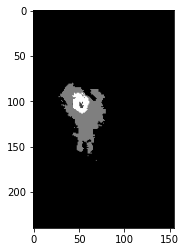

In [21]:
img = cv2.imread(path)
plt.imshow(img)

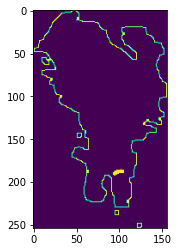

In [29]:
transforms = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=700),
    t.RegionSelection(region=1),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
    t.MinimumBoundingBox(),
])

transformed_img = transforms(img)
plt.imshow(transformed_img)

In [5]:
contours, _ = cv2.findContours(transformed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)

4

In [6]:
for c in contours:
    area = cv2.contourArea(c)
    print(area)

24.5
20.0
24.5
19374.5


In [7]:
g_cnt = max(contours, key=cv2.contourArea)
area = cv2.contourArea(g_cnt)
print(area)
len(g_cnt)

19374.5


897

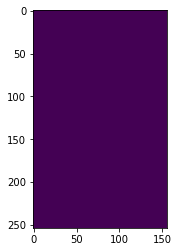

In [10]:
import numpy as np

ref = np.zeros_like(transformed_img)
plt.imshow(ref)

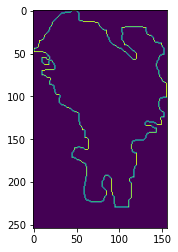

In [11]:
cv2.drawContours(ref, [g_cnt], 0, 255, 1)
# for contour in contours:
#     ref = cv2.polylines(ref, [contour], False, (0, 255, 0), 3) 
plt.imshow(ref)

In [18]:
M = cv2.moments(ref)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])
print(centroid_x)
print(centroid_y)

83
108


In [13]:
width = transformed_img.shape[1]
height = transformed_img.shape[0]

print(width)
print(height)

156
254


In [14]:
N = 360
distances = []
import math
out = img.copy()

In [15]:
for i in np.arange(0, N, 1):
    tmp = np.zeros_like(transformed_img)

    theta = i*(360/N)
    theta *= np.pi/180.0

    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)

    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)

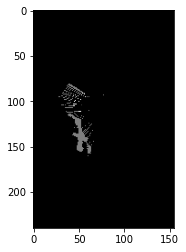

In [16]:
plt.imshow(out)

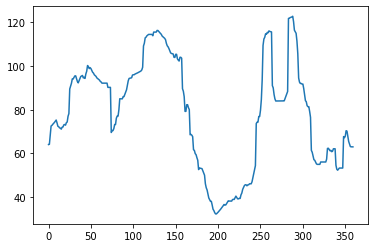

In [17]:
plt.plot(np.arange(0, N, 1), distances)